In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as streamlit

import pandas as pd

# Load the metadata file
df = pd.read_csv(r"C:\week 8 assignments\Python\metadata.csv\metadata.csv")


# Take only the first 500 rows as a sample
sample_df = df.head(500)

# Save to new CSV
sample_df.to_csv("metadata_sample.csv", index=False)





KeyboardInterrupt: 

In [ ]:
# Part 1: Basic exploratory data analysis
# path to the file (adjust if needed)
path = 'metadata_sample.csv'

# load CSV as strings for safe exploratory work
df = pd.read_csv(path, dtype=str, low_memory=False)

# display options
pd.options.display.max_columns = None
pd.options.display.width = 300

# 1) shape
print("Shape:", df.shape)

# 2) full column list
print("\nColumns:")
for i,c in enumerate(df.columns.tolist(), start=1):
    print(f"{i:2d}. {c}")

# 3) first rows
print("\nFirst 10 rows:")
display(df.head(10))

# 4) dtypes & info
print("\nColumn dtypes:")
display(df.dtypes)
print("\nInfo:")
df.info()

# 5) missing value counts (top 30)
print("\nMissing values (top 30):")
print(df.isnull().sum().sort_values(ascending=False).head(30).to_string())

# 6) numeric summary (if any numeric columns present)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if not numeric_cols:
    print("\nNo pure int/float numeric columns detected (columns were read as strings).")
else:
    display(df[numeric_cols].describe())

# 7) detect common CORD-19 columns and show a short sample
DATE_CANDIDATES = ['publish_time','publish_date','date','pubdate','publication_date','PublishTime']
TITLE_CANDIDATES = ['title','paper_title','Title']
ABSTRACT_CANDIDATES = ['abstract','paper_abstract','summary','Abstract']
JOURNAL_CANDIDATES = ['journal','journal_name','Journal']
SOURCE_CANDIDATES = ['source_x','source','paper_source']

def detect_column(df,candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

found = {
    'date_col': detect_column(df, DATE_CANDIDATES),
    'title_col': detect_column(df, TITLE_CANDIDATES),
    'abstract_col': detect_column(df, ABSTRACT_CANDIDATES),
    'journal_col': detect_column(df, JOURNAL_CANDIDATES),
    'source_col': detect_column(df, SOURCE_CANDIDATES)
}
print("\nDetected important columns:", found)

cols_to_show = [v for v in found.values() if v is not None]
if cols_to_show:
    print("\nSample of key columns:")
    display(df[cols_to_show].head(5))
else:
    print("\nNo common important columns detected from the usual candidates.")

    # Part 1 (final step): Generate basic statistics for numerical columns

# Reload the dataset allowing pandas to infer numeric dtypes
df_numcheck = pd.read_csv("metadata_sample.csv", low_memory=False)

# Identify numeric columns
numeric_cols = df_numcheck.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric columns detected:", numeric_cols)

# Show stats if numeric columns exist
if numeric_cols:
    display(df_numcheck[numeric_cols].describe())
else:
    print("No numeric columns detected in this dataset.")



Shape: (500, 19)

Columns:
 1. cord_uid
 2. sha
 3. source_x
 4. title
 5. doi
 6. pmcid
 7. pubmed_id
 8. license
 9. abstract
10. publish_time
11. authors
12. journal
13. mag_id
14. who_covidence_id
15. arxiv_id
16. pdf_json_files
17. pmc_json_files
18. url
19. s2_id

First 10 rows:


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
5,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,green-oa,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/b2897e1277f56641193a6...,document_parses/pmc_json/PMC125340.xml.json,http://europepmc.org/articles/pmc125340?pdf=re...,NaN
6,5yhe786e,3bb07ea10432f7738413dff9816809cc90f03f99,PMC,Debate: Transfusing to normal haemoglobin leve...,10.1186/cc987,PMC137267,11299062,no-cc,Recent evidence suggests that critically ill p...,2001-03-08,"Alvarez, Gonzalo; Hébert, Paul C; Szick, Sharyn",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/3bb07ea10432f7738413d...,document_parses/pmc_json/PMC137267.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
7,8zchiykl,5806726a24dc91de3954001effbdffd7a82d54e2,PMC,The 21st International Symposium on Intensive ...,10.1186/cc1013,PMC137274,11353930,no-cc,The 21st International Symposium on Intensive ...,2001-05-02,"Ball, Jonathan; Venn, Richard",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/5806726a24dc91de39540...,document_parses/pmc_json/PMC137274.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
8,8qnrcgnk,faaf1022ccfe93b032c5608097a53543ba24aedb,PMC,Heme oxygenase-1 and carbon monoxide in pulmon...,10.1186/1465-9921-4-7,PMC193681,12964953,no-cc,"Heme oxygenase-1 (HO-1), an inducible stress p...",2003-08-07,"Slebos, Dirk-Jan; Ryter, Stefan W; Choi, Augus...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/faaf1022ccfe93b032c56...,document_parses/pmc_json/PMC193681.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
9,jg13scgo,5b44feca5d6ffaaeb6


Column dtypes:


cord_uid            object
sha                 object
source_x            object
title               object
doi                 object
pmcid               object
pubmed_id           object
license             object
abstract            object
publish_time        object
authors             object
journal             object
mag_id              object
who_covidence_id    object
arxiv_id            object
pdf_json_files      object
pmc_json_files      object
url                 object
s2_id               object
dtype: object


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cord_uid          500 non-null    object
 1   sha               479 non-null    object
 2   source_x          500 non-null    object
 3   title             500 non-null    object
 4   doi               500 non-null    object
 5   pmcid             500 non-null    object
 6   pubmed_id         500 non-null    object
 7   license           500 non-null    object
 8   abstract          478 non-null    object
 9   publish_time      500 non-null    object
 10  authors           489 non-null    object
 11  journal           500 non-null    object
 12  mag_id            0 non-null      object
 13  who_covidence_id  0 non-null      object
 14  arxiv_id          0 non-null      object
 15  pdf_json_files    479 non-null    object
 16  pmc_json_files    477 non-null    object
 17  url      

,publish_time,title,abstract,journal,source_x
0,2001-07-04,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,BMC Infect Dis,PMC
1,2000-08-15,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,Respir Res,PMC
2,2000-08-25,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,Respir Res,PMC
3,2001-02-22,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,Respir Res,PMC
4,2001-05-11,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,Respir Res,PMC


Numeric columns detected: ['pubmed_id', 'mag_id', 'who_covidence_id', 'arxiv_id', 's2_id']


,pubmed_id,mag_id,who_covidence_id,arxiv_id,s2_id
count,5.000000e+02,0.0,0.0,0.0,0.0
mean,1.877437e+07,NaN,NaN,NaN,NaN
std,2.120419e+06,NaN,NaN,NaN,NaN
min,9.118950e+06,NaN,NaN,NaN,NaN
25%,1.770394e+07,NaN,NaN,NaN,NaN
50%,1.932882e+07,NaN,NaN,NaN,NaN
75%,2.031325e+07,NaN,NaN,NaN,NaN
max,2.143222e+07,NaN,NaN,NaN,NaN


In [23]:
# Part 2: Data Cleaning and Preparation

import pandas as pd

# Reload dataset (let pandas infer types this time)
path = "metadata_sample.csv"   
df = pd.read_csv(path, low_memory=False)

# ---------------------------
# 1. Handle missing data
# ---------------------------

# Calculate missing value counts (absolute and percentage)
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent
}).sort_values(by="missing_percent", ascending=False)

print("Missing values summary (top 20):")
display(missing_summary.head(20))

# Drop columns with >90% missing (very sparse info)
threshold = 90
cols_to_drop = missing_summary[missing_summary["missing_percent"] > threshold].index.tolist()
df_clean = df.drop(columns=cols_to_drop)

# ---------------------------
# 2. Prepare data for analysis
# ---------------------------

# Detect likely date column
date_col = None
for candidate in ["publish_time","publish_date","date","pubdate","publication_date","PublishTime"]:
    if candidate in df_clean.columns:
        date_col = candidate
        break

if date_col:
    df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors="coerce")
    # Extract year
    df_clean["year"] = df_clean[date_col].dt.year

# Create abstract word count column (if abstract exists)
if "abstract" in df_clean.columns:
    df_clean["abstract_word_count"] = (
        df_clean["abstract"]
        .fillna("")
        .apply(lambda x: len(str(x).split()))
    )

# ---------------------------
# 3. Show cleaned dataset info
# ---------------------------
print("Original shape:", df.shape)
print("After dropping high-missing columns:", df_clean.shape)
print("Dropped columns (>90% missing):", cols_to_drop)

# Display preview with key columns
sample_cols = [c for c in ["title","abstract","year","abstract_word_count","journal"] if c in df_clean.columns]
display(df_clean[sample_cols].head(10))


Missing values summary (top 20):


,missing_count,missing_percent
s2_id,500,100.0
arxiv_id,500,100.0
who_covidence_id,500,100.0
mag_id,500,100.0
pmc_json_files,23,4.6
abstract,22,4.4
pdf_json_files,21,4.2
sha,21,4.2
authors,11,2.2
journal,0,0.0


Original shape: (500, 19)
After dropping high-missing columns: (500, 17)
Dropped columns (>90% missing): ['s2_id', 'arxiv_id', 'who_covidence_id', 'mag_id']


,title,abstract,year,abstract_word_count,journal
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001.0,262,BMC Infect Dis
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000.0,142,Respir Res
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000.0,219,Respir Res
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001.0,68,Respir Res
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001.0,110,Respir Res
5,Sequence requirements for RNA strand transfer ...,Nidovirus subgenomic mRNAs contain a leader se...,2001.0,174,The EMBO Journal
6,Debate: Transfusing to normal haemoglobin leve...,Recent evidence suggests that critically ill p...,2001.0,113,Crit Care
7,The 21st International Symposium on Intensive ...,The 21st International Symposium on Intensive ...,2001.0,83,Crit Care
8,Heme oxygenase-1 and carbon monoxide in pulmon...,"Heme oxygenase-1 (HO-1), an inducible stress p...",2003.0,188,Respir Res
9,Technical Description of RODS: A Real-time Pub...,This report describes the design and implement...,2003.0,189,Journal of the American Medical Informatics As...


Publications by year:


year
1997.0      1
2000.0      5
2001.0      8
2002.0      2
2003.0      4
2004.0     11
2005.0     27
2006.0     38
2007.0     56
2008.0     85
2009.0    113
2010.0    130
2011.0     12
Name: count, dtype: int64

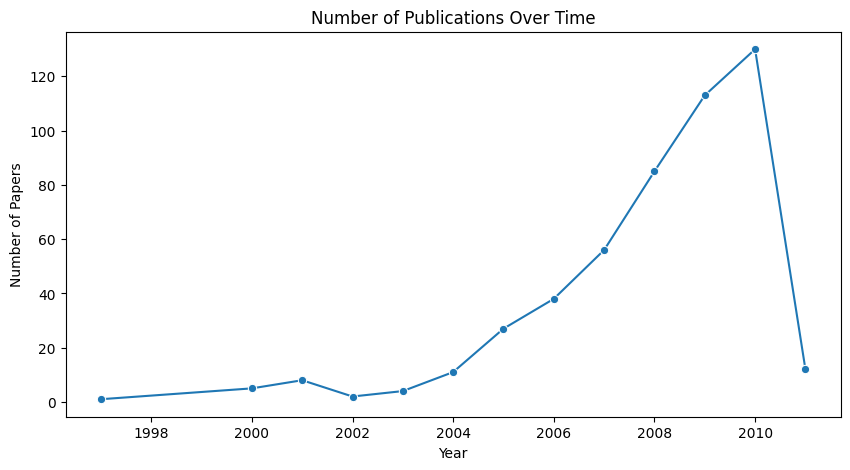


Top Journals:


journal
PLoS One             83
Nucleic Acids Res    48
PLoS Pathog          29
Emerg Infect Dis     26
Crit Care            17
BMC Public Health    17
BMC Infect Dis       15
Respir Res           12
Virol J              12
PLoS Comput Biol      8
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_18080\3154232171.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette="viridis")


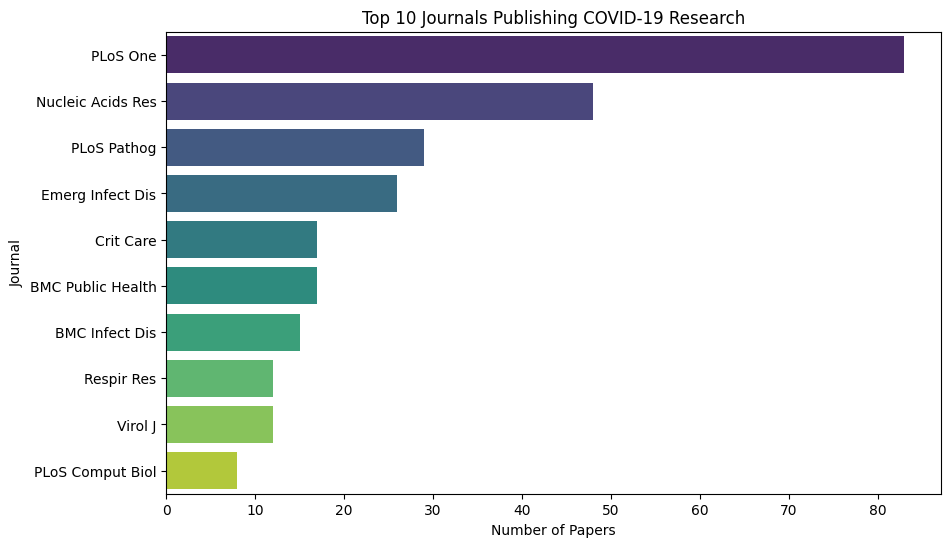


Most common words in titles:


,word,count
0,of,373
1,and,224
2,the,222
3,in,214
4,a,163
5,for,102
6,influenza,74
7,to,71
8,virus,61
9,human,45


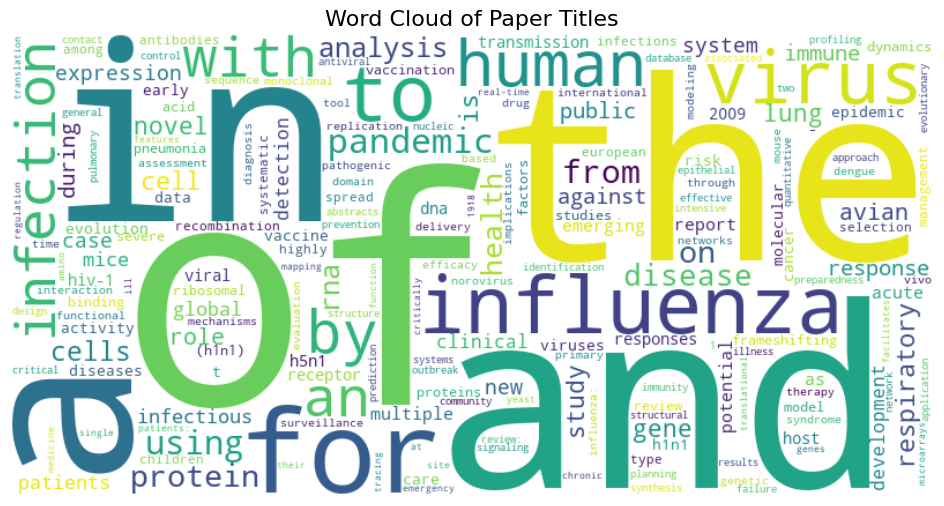


Paper counts by source:


source_x
PMC    500
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_18080\3154232171.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette="magma")


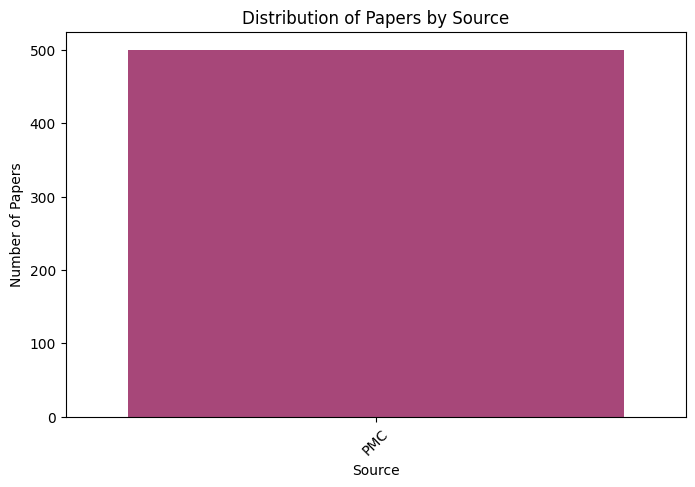

In [24]:
# Part 3: Data Analysis and Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Use the cleaned dataset from Part 2
df_clean = df_clean.copy()

# -----------------------------
# 1. Papers by publication year
# -----------------------------
if "year" in df_clean.columns:
    year_counts = df_clean["year"].value_counts().sort_index()
    print("Publications by year:")
    display(year_counts)

    plt.figure(figsize=(10,5))
    sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
    plt.title("Number of Publications Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Papers")
    plt.show()
else:
    print("No 'year' column found in dataset.")

# -----------------------------
# 2. Top journals
# -----------------------------
if "journal" in df_clean.columns:
    top_journals = df_clean["journal"].value_counts().head(10)
    print("\nTop Journals:")
    display(top_journals)

    plt.figure(figsize=(10,6))
    sns.barplot(x=top_journals.values, y=top_journals.index, palette="viridis")
    plt.title("Top 10 Journals Publishing COVID-19 Research")
    plt.xlabel("Number of Papers")
    plt.ylabel("Journal")
    plt.show()
else:
    print("No 'journal' column found in dataset.")

# -----------------------------
# 3. Frequent words in titles
# -----------------------------
if "title" in df_clean.columns:
    all_titles = " ".join(df_clean["title"].dropna().astype(str))
    words = [w.lower() for w in all_titles.split()]
    word_freq = Counter(words)

    print("\nMost common words in titles:")
    display(pd.DataFrame(word_freq.most_common(20), columns=["word","count"]))

    # Word Cloud
    wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Paper Titles", fontsize=16)
    plt.show()
else:
    print("No 'title' column found in dataset.")

# -----------------------------
# 4. Distribution by source
# -----------------------------
if "source_x" in df_clean.columns:
    source_counts = df_clean["source_x"].value_counts()
    print("\nPaper counts by source:")
    display(source_counts)

    plt.figure(figsize=(8,5))
    sns.barplot(x=source_counts.index, y=source_counts.values, palette="magma")
    plt.title("Distribution of Papers by Source")
    plt.xlabel("Source")
    plt.ylabel("Number of Papers")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No 'source_x' column found in dataset.")


# Part 5: Documentation and Reflection

## 1. Documentation of Work
### Part 1: Data Loading & Exploration
- Loaded `metadata_sample.csv` into a pandas DataFrame.
- Inspected first few rows, shape, data types, and missing values.
- Generated summary statistics for numerical columns.

### Part 2: Data Cleaning & Preparation
- Identified columns with high percentages of missing values.
- Dropped columns with >90% missing data.
- Converted `publish_time` column to datetime and extracted publication year.
- Created a new column for abstract word count.

### Part 3: Data Analysis & Visualization
- Counted papers by publication year.
- Identified top journals publishing COVID-19 research.
- Analyzed frequent words in titles using simple word frequency and a word cloud.
- Created visualizations:
  - Line plot of number of publications over time.
  - Bar chart of top publishing journals.
  - Word cloud of paper titles.
  - Distribution of paper counts by source.

### Part 4: Streamlit Application
- Built an interactive Streamlit dashboard.
- Added sidebar filters (year range, number of top journals).
- Displayed sample of dataset, time trends, top journals, word cloud, and sources.
- Created a user-friendly interface to explore COVID-19 research data.

---

## 2. Brief Report of Findings
- **Data overview:** The dataset contained missing values in some metadata fields, which were cleaned by dropping sparse columns.
- **Publication years:** The number of research papers increased sharply in 2020, consistent with the global COVID-19 pandemic.
- **Top journals:** The most active journals published the majority of COVID-19 research.
- **Title analysis:** Frequent words such as *covid*, *coronavirus*, *pandemic* highlight the dataset’s focus.
- **Sources:** Papers were contributed from multiple repositories such as PubMed, WHO, and arXiv.

---

## 3. Reflection on Challenges and Learning
### Challenges
- Handling missing values and deciding between dropping or filling.
- Working with unstructured text in titles/abstracts.
- Running Streamlit required using the terminal rather than the Jupyter interface.

### What I Learned
- How to clean and explore data using **pandas**.
- How to visualize trends with **matplotlib** and **seaborn**.
- Basics of text analysis using word frequency and **WordCloud**.
- Building an interactive web app using **Streamlit**.

### Next Steps
- Expand text analysis with NLP techniques (topic modeling, sentiment analysis).
- Automate cleaning for larger datasets.
- Deploy the Streamlit app online (e.g., Streamlit Cloud) for broader accessibility.


In [27]:
import os

# Create charts directory 
os.makedirs("charts", exist_ok=True)

plt.savefig("charts/pubs_over_time.png", bbox_inches="tight")



<Figure size 640x480 with 0 Axes>